In [26]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('PreparedData\\np_signals.txt')
labels = np.loadtxt('PreparedData\\np_lables.txt')

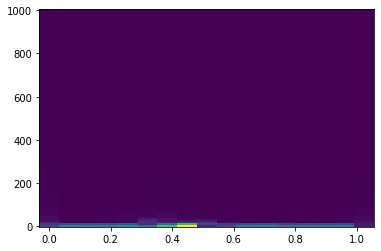

In [50]:
stft1, stft2, stft3 = signal.stft(data[505], 1000)
plt.pcolormesh(stft2, stft1, abs(stft3), shading='auto')
plt.show()

In [46]:
print(stft3)

[[-8.87416236e+03+0.00000000e+00j -1.83160203e+04+0.00000000e+00j
  -1.81663799e+04+0.00000000e+00j ... -1.75051831e+04+0.00000000e+00j
  -1.72996990e+04+0.00000000e+00j -2.90892511e+03+0.00000000e+00j]
 [ 4.43100573e+03-5.62010202e+03j  9.16541347e+03-2.90508619e+02j
   9.06135291e+03+3.92065874e+02j ...  8.78953328e+03-2.00785421e+02j
   9.54604360e+03+6.16690157e+02j -3.61667630e+02+2.67359148e+03j]
 [-3.29051500e+01+3.69902263e+03j  6.98253571e+01+1.13375188e+02j
  -9.88584593e+01-2.08826357e+02j ... -4.65132054e+01-2.71296420e+01j
  -2.12718958e+02+5.60230402e+02j  2.10080852e+03+4.68306560e+02j]
 ...
 [-6.80293154e+01+1.64245613e+00j  7.09022512e-02-1.47327247e-01j
   4.99656542e-01-7.34931149e-01j ... -2.75419224e-02-5.98219317e-01j
  -1.56123829e+01-1.48661444e+01j -3.43998744e+01-3.28178123e+01j]
 [ 6.81338776e+01-7.61732487e-01j -1.93170582e-02+1.31818279e-02j
  -1.26549467e-01+3.33533978e-01j ...  4.00340170e-03+3.46354600e-01j
   7.96007194e+00-2.02890475e+01j -1.76623862e+

In [40]:
labels[500]

1.0